Import everything

Create tire file

In [2]:
import pickle as pkl
from tire_model import tire

'''18x6-10 R20'''
cornering_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_Cornering_ASCII_USCS_Round9\\A2356run32.dat'
accel_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_DriveBrake_ASCII_USCS_Round9\\A2356run72.dat'
    
'''18x7.5-10 R25B'''
#cornering_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_10inch_Cornering_ASCII_USCS_Round6\\A1654run21.dat'
#accel_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RawData_10inch_DriveBrake_ASCII_USCS_Round6\\A1654raw35.dat'

new_tire = tire(cornering_data, accel_data)
file_name = '18x6-10_R20.pkl'

with open(file_name, 'wb') as f:
    pkl.dump(new_tire, f)
    

Tire analysis

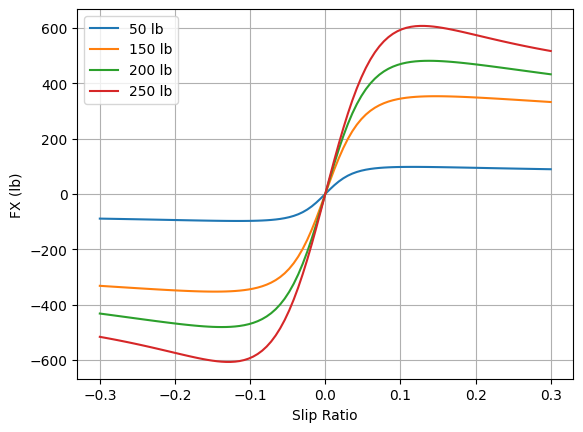

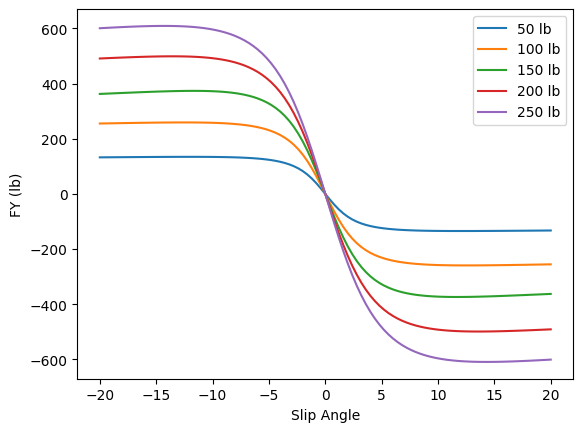

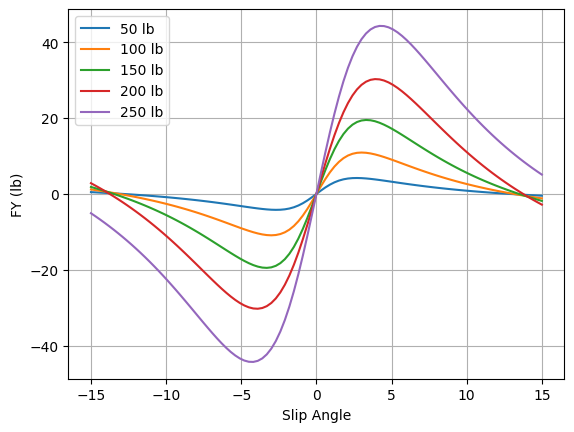

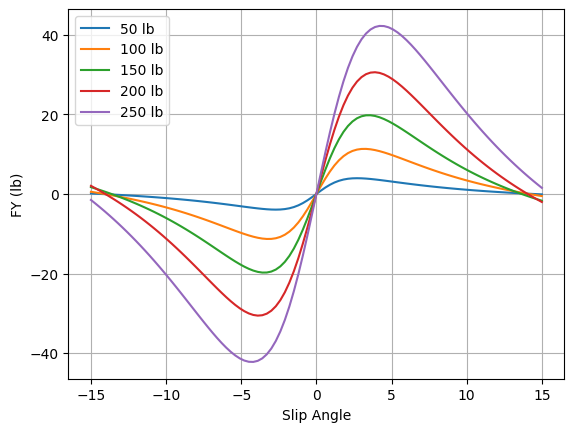

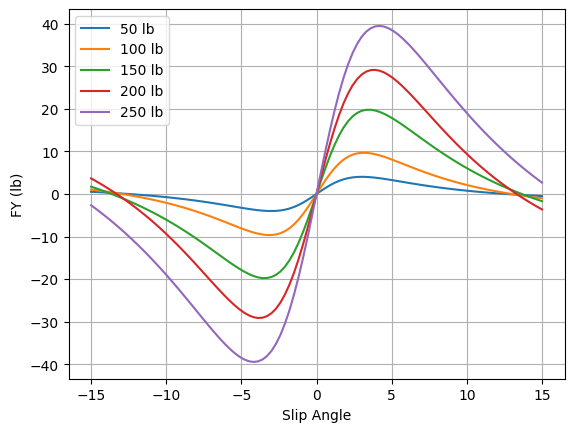

In [ ]:
import pickle as pkl
from tire_model import tire
from matplotlib import pyplot as plt

file_name = '18x6-10_R20.pkl'
with open(file_name, 'rb') as f:
    wheel = pkl.load(f)

wheel.SR_FX_plot(0)
plt.grid()
wheel.SA_FY_plot(0)
wheel.SA_MZ_plot(0)
wheel.SA_MZ_plot(2)
wheel.SA_MZ_plot(4)

Create Drivetrain file

In [1]:
import pickle as pkl
from drivetrain_model import drivetrain

train = drivetrain()
file_name = 'drivetrain.pkl'

with open(file_name, 'wb') as f:
    pkl.dump(train, f)

Create Car Model

In [2]:
import pickle as pkl
from car_model import car

racecar = car()
file_name = 'car.pkl'
racecar.traction_curve()

with open(file_name, 'wb') as f:
    pkl.dump(racecar, f)

AttributeError: 'car' object has no attribute 'AY'

Create Track

333.38003315179736


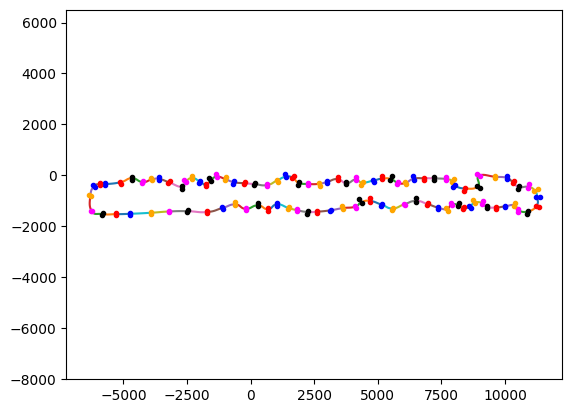

 [####################################################################################################] 100%	cost = 142.53241698805965


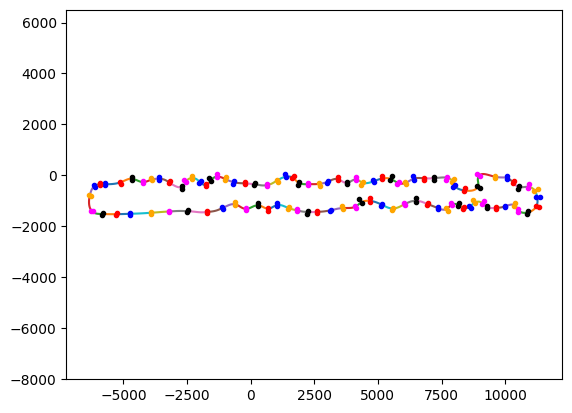

[Track Saved.]


In [3]:
import spline_track as spln
import pickle

points_file = 'C:autocross_pts.pkl'

save_file = 'autocross_trk.pkl'

with open(points_file, 'rb') as f:
    points = pickle.load(f)

points_x = points['p1x']
points_y = points['p1y']
points_x2 = points['p2x']
points_y2 = points['p2y']

trk = spln.track(points_x, points_y, points_x2, points_y2)
print(trk.get_cost())
trk.plot()
#trk.adjust_track(1, 30)
trk.adjust_track([40, 30, 30, 80], [100, 30, 10, 5])

trk.plot()
#print(trk.get_cost())

step = 0.0001

txt_input = ''
while (txt_input != 'y') and (txt_input != 'n'):
    txt_input = input('save track?: ')
if txt_input == 'y':
    with open(save_file, 'wb') as f:
        pickle.dump(trk, f)
    print('[Track Saved.]')
else:
    print('[Track Discarded.]')

[-10.43149077  -1.79191337 344.37748354   0.46404378]


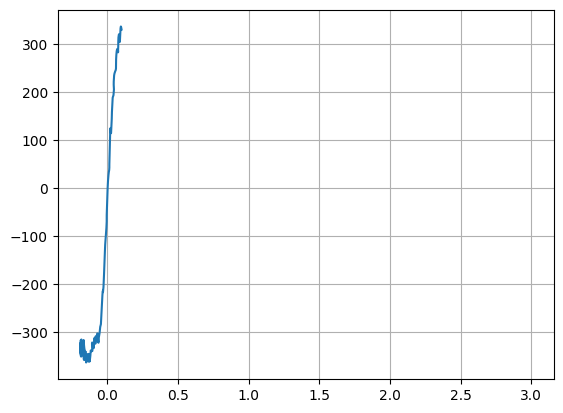

In [ ]:
import numpy as np
import pickle as pkl
from tire_model import tire
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

def magic_func(x, B, C, D, E):
    return D * np.sin(C * np.arctan(B*x - E * (B*x - np.arctan(B*x))))

file_name = '18x6-10_R20.pkl'
with open(file_name, 'rb') as f:
    wheel = pkl.load(f)

load = 150
indx = wheel.find_section('accel', [['FZ', -load], ['IA', 4], ['SA', 0], ['P', 12]])
dataset = wheel.accel_data_sets[indx]

SA = wheel.accel_titles.index('SR')
x = dataset.data[SA]

FX = wheel.accel_titles.index('FX')
y = dataset.data[FX]


center = 0
for i in range(len(y)):
    if y[i] <= 0:
        offset = x[i]
        x -= offset
        break

plt.plot(x, y)


x1, x2, y1, y2, asdf = 0,0,0,0,0
for i in range(len(x)):
    if x[i] <= 0.02:
        x1 = x[i]
        y1 = y[i]
        asdf = i
        break

for i in range(asdf, len(x)):
    if x[i] <= -0.02:
        x2 = x[i]
        y2 = y[i]
        break

slope = (y2 - y1) / (x2 - x1)
C0 = -1.5
D0 = y.max()
B0 = slope / D0 / C0
popt, pcov = curve_fit(magic_func, x, y, p0=[B0, C0, D0, 0.5], bounds=([-np.inf, -np.inf, 0, 0], [np.inf, 0, np.inf, 1]))
print(popt)

new_x = np.linspace(-0.3, 0.3, 400)
plt.plot(new_x, magic_func(new_x, *popt))
plt.grid()
plt.show()



0 50


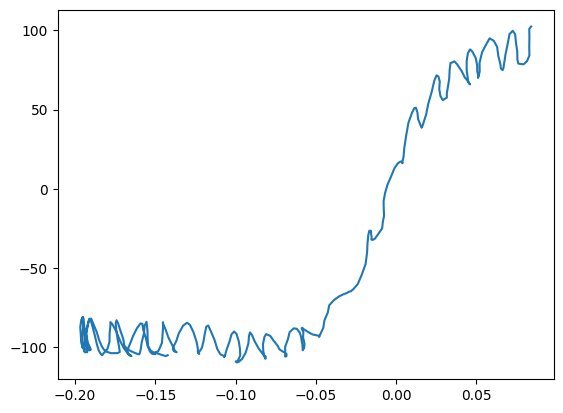

0 150


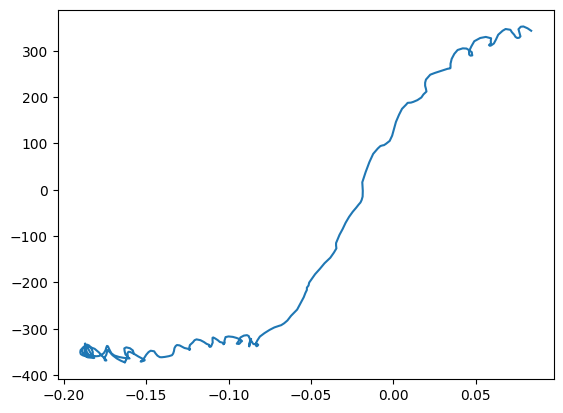

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [1]:
import numpy as np
import pickle as pkl
from tire_model import tire
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

def magic_func(x, B, C, D, E):
    return D * np.sin(C * np.arctan(B*x - E * (B*x - np.arctan(B*x))))

file_name = '18x6-10_R20.pkl'
with open(file_name, 'rb') as f:
    wheel = pkl.load(f)

load = 150
indx = wheel.find_section('accel', [['FZ', -load], ['IA', 4]])
dataset = wheel.accel_data_sets[indx]

SA = wheel.corner_titles.index('SR')
x = dataset.data[SA]

FY = wheel.corner_titles.index('FX')
y = dataset.data[FY]
friction_coeff = y.max()

dataset.magic_fit(x, y)



In [2]:
def fuck_u(a, b, c):
    print(a)
    print(b)
    print(c)

args = [1, 2, 3]
fuck_u(*args)

1
2
3
